In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from numpy import sqrt 
from matplotlib import pyplot 
from numpy import log 

In [2]:
cocacola=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


## EDA

In [3]:
cocacola[cocacola.duplicated()]


,Quarter,Sales


In [4]:
cocacola.isnull().sum()


Quarter    0
Sales      0
dtype: int64

In [5]:
cocacola.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
cocacola.describe()


,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [7]:
def seperatequater(x):
    list_q=x.split('_')
    return list_q[0]
cocacola['quarter']=cocacola['Quarter'].apply(seperatequater)

In [8]:
cocacola.head()


,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [9]:
def calculateyear(x):
    item=x.split('_')
    finalyear='19'+item[1]
    return finalyear
cocacola['year']=cocacola['Quarter'].apply(calculateyear)


In [10]:
cocacola.head()


,Quarter,Sales,quarter,year
0,Q1_86,1734.827000,Q1,1986
1,Q2_86,2244.960999,Q2,1986
2,Q3_86,2533.804993,Q3,1986
3,Q4_86,2154.962997,Q4,1986
4,Q1_87,1547.818996,Q1,1987


In [11]:
cc=cocacola.iloc[:,1:]
cc.head()

,Sales,quarter,year
0,1734.827000,Q1,1986
1,2244.960999,Q2,1986
2,2533.804993,Q3,1986
3,2154.962997,Q4,1986
4,1547.818996,Q1,1987


In [12]:
df=pd.get_dummies(cc['quarter'])
df.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [13]:
cc=pd.concat([cc,df],axis=1)
cc.head()

,Sales,quarter,year,Q1,Q2,Q3,Q4
0,1734.827000,Q1,1986,1,0,0,0
1,2244.960999,Q2,1986,0,1,0,0
2,2533.804993,Q3,1986,0,0,1,0
3,2154.962997,Q4,1986,0,0,0,1
4,1547.818996,Q1,1987,1,0,0,0


In [14]:
t_list=[x for x in range(1,len(cc)+1)]
cc['t']=t_list
cc['t_square']=cc['t']*cc['t']

#log transformation
cc['log_Sales']=np.log10(cc.Sales)
cc.head()

,Sales,quarter,year,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,1734.827000,Q1,1986,1,0,0,0,1,1,3.239256
1,2244.960999,Q2,1986,0,1,0,0,2,4,3.351209
2,2533.804993,Q3,1986,0,0,1,0,3,9,3.403773
3,2154.962997,Q4,1986,0,0,0,1,4,16,3.333440
4,1547.818996,Q1,1987,1,0,0,0,5,25,3.189720


In [15]:
cc.shape


(42, 10)

In [16]:
#Divide data into Tow part Train and test
train,test=train_test_split(cc,test_size=0.25)


In [17]:
train.shape,test.shape


((31, 10), (11, 10))

## Visualization


<AxesSubplot:>

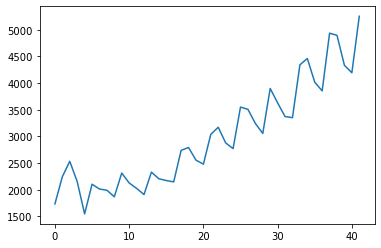

In [18]:
cc.Sales.plot()


<AxesSubplot:xlabel='quarter', ylabel='year'>

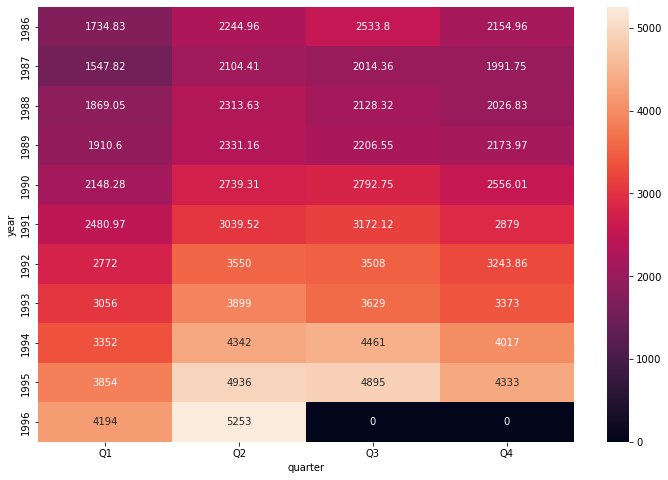

In [19]:
plt.figure(figsize=(12,8))
heatmap_y_year = pd.pivot_table(data=cc,values="Sales",index="year",columns="quarter",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_year,annot=True,fmt="g") #fmt is format of the grid values


<AxesSubplot:xlabel='quarter', ylabel='Sales'>

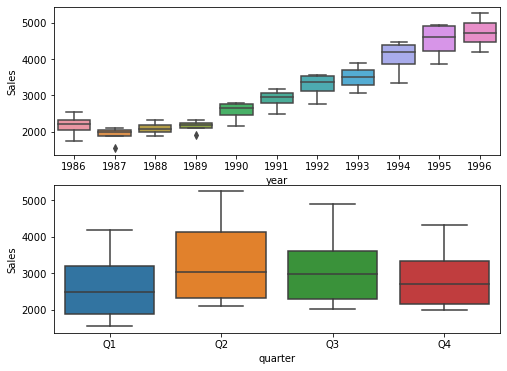

In [20]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="year",y="Sales",data=cc)
plt.subplot(212)
sns.boxplot(x="quarter",y="Sales",data=cc)

<AxesSubplot:xlabel='year', ylabel='Sales'>

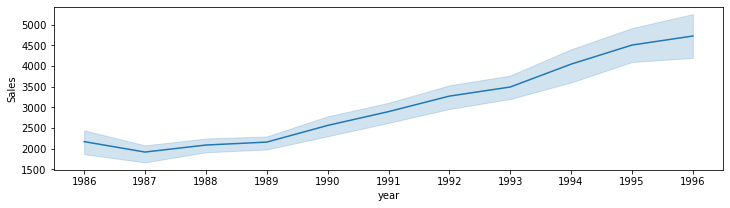

In [21]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=cc) 

In [22]:
#Linear model
import statsmodels.formula.api as smf
li_model=smf.ols('Sales~t',data=train).fit()
pred_linear=pd.Series(li_model.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

482.7479672235114

In [23]:
#exponential
Exp=smf.ols('log_Sales~t',data=train).fit()
pred_exp=pd.Series(Exp.predict(pd.DataFrame(test['t']))) 
rmse_exp=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2)) 
rmse_exp

3029.7102467537284

In [24]:
#Quadratics
Quad=smf.ols('Sales~t+t_square',data=train).fit()
pred_quad=pd.Series(Quad.predict(test[["t","t_square"]]))
rmse_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quad))**2)) 
rmse_quad

360.1659191872205

In [25]:
#Additive Seasonality
add_sea=smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea=pd.Series(add_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2)) 
rmse_add_sea

996.1049748488435

In [26]:
#Additive Seasonal quadratic

add_sea_quad=smf.ols('Sales~Q1+Q2+Q3+Q4+t+t_square',data=train).fit()
pred_add_sea_quad=pd.Series(add_sea_quad.predict(test[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_add_sea_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2)) 
rmse_add_sea_quad

180.47160080401298

In [27]:
#Multiplicative Seasonality
Mul_sea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_sea=pd.Series(Mul_sea.predict(test))
rmse_mul_sea=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_sea)))**2)) 
rmse_mul_sea


3030.4211111079267

In [28]:
# Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

3029.6007555607935

In [29]:
#Compare the results 

data={"MODel":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_mul_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)

table_rmse.sort_values(['RMSE_Values'])

,MODel,RMSE_Values
4,rmse_add_sea_quad,180.471601
2,rmse_quad,360.165919
0,rmse_linear,482.747967
3,rmse_add_sea,996.104975
6,rmse_Mult_add_sea,3029.600756
1,rmse_exp,3029.710247
5,rmse_mul_sea,3030.421111


## Additive Seasonality Quadratic model' has the least value of RMSE among the models prepared


In [30]:
predict_data=cc.iloc[30:40,:]
predict_data

,Sales,quarter,year,Q1,Q2,Q3,Q4,t,t_square,log_Sales
30,3629.0,Q3,1993,0,0,1,0,31,961,3.559787
31,3373.0,Q4,1993,0,0,0,1,32,1024,3.528016
32,3352.0,Q1,1994,1,0,0,0,33,1089,3.525304
33,4342.0,Q2,1994,0,1,0,0,34,1156,3.637690
34,4461.0,Q3,1994,0,0,1,0,35,1225,3.649432
35,4017.0,Q4,1994,0,0,0,1,36,1296,3.603902
36,3854.0,Q1,1995,1,0,0,0,37,1369,3.585912
37,4936.0,Q2,1995,0,1,0,0,38,1444,3.693375
38,4895.0,Q3,1995,0,0,1,0,39,1521,3.689753
39,4333.0,Q4,1995,0,0,0,1,40,1600,3.636789


In [32]:
predict_data=predict_data.drop(columns=['Sales','log_Sales','year'])


KeyError: "['Sales', 'log_Sales', 'year'] not found in axis"

In [33]:
predict_data

,quarter,Q1,Q2,Q3,Q4,t,t_square
30,Q3,0,0,1,0,31,961
31,Q4,0,0,0,1,32,1024
32,Q1,1,0,0,0,33,1089
33,Q2,0,1,0,0,34,1156
34,Q3,0,0,1,0,35,1225
35,Q4,0,0,0,1,36,1296
36,Q1,1,0,0,0,37,1369
37,Q2,0,1,0,0,38,1444
38,Q3,0,0,1,0,39,1521
39,Q4,0,0,0,1,40,1600


In [35]:
model_full = smf.ols('Sales~Q1+Q2+Q3+Q4+t+t_square', data = cc).fit()
model_full

In [36]:
pred_new=pd.Series(add_sea_quad.predict(predict_data))
pred_new

30    3739.395655
31    3574.512095
32    3451.896482
33    4223.178089
34    4181.809618
35    4030.171558
36    3920.801444
37    4705.328550
38    4677.205580
39    4538.813018
dtype: float64

In [37]:
predict_data["forecasted_Sale"]=pd.Series(pred_new)


In [38]:
predict_data

,quarter,Q1,Q2,Q3,Q4,t,t_square,forecasted_Sale
30,Q3,0,0,1,0,31,961,3739.395655
31,Q4,0,0,0,1,32,1024,3574.512095
32,Q1,1,0,0,0,33,1089,3451.896482
33,Q2,0,1,0,0,34,1156,4223.178089
34,Q3,0,0,1,0,35,1225,4181.809618
35,Q4,0,0,0,1,36,1296,4030.171558
36,Q1,1,0,0,0,37,1369,3920.801444
37,Q2,0,1,0,0,38,1444,4705.328550
38,Q3,0,0,1,0,39,1521,4677.205580
39,Q4,0,0,0,1,40,1600,4538.813018
